In [1]:
from importlib.resources import files
from Consensus import *

In [2]:
EXAMPLE_TREES_PATH = files("Consensus.example_data").joinpath("GTRgamma_edit.nex")
EXAMPLE_ASTRAL_TREE_PATH = files("Consensus.example_data").joinpath("astral_GTRgamma.tre")

# Load Data

In [3]:
from Consensus import *
import ete3

In [4]:
input_trees = TreeList_with_support.get(path = EXAMPLE_TREES_PATH, schema = "nexus") # for files containing multiple trees

# please specify the same 'taxon_namespace' object when reading the data


In [5]:
# majority rule consensus
majority = input_trees.majority_rule_consensus()

In [6]:
majority.compute_branch_support(treelist=input_trees)
majority.compute_transfer_support(treelist=input_trees)

In [7]:
## length as support 
for edge in majority.postorder_edge_iter():
    edge.length = majority.branch_support[int(edge.bipartition)]

In [8]:
string=majority.as_string(schema='newick',suppress_rooting=True)

In [9]:
print(string)

(S1:1.0,S2:1.0,(S3:1.0,((S7:1.0,S8:1.0,((S11:1.0,S12:1.0):0.989,(S9:1.0,S10:1.0):0.885):0.828,(S4:1.0,S5:1.0,S6:1.0):0.844):1.0,((S35:1.0,((S91:1.0,S92:1.0):1.0,(S36:1.0,S37:1.0,S40:1.0,S41:1.0,S42:1.0,S43:1.0,S44:1.0,S45:1.0,S48:1.0,(S38:1.0,S39:1.0):0.951,(S61:1.0,S62:1.0,S63:1.0,S64:1.0,S65:1.0,S66:1.0,S67:1.0,S68:1.0):1.0,(S69:1.0,S70:1.0,S71:1.0,S72:1.0,(S73:1.0,(S74:1.0,S75:1.0):0.935):0.99,((S84:1.0,S85:1.0,(S81:1.0,S82:1.0,S83:1.0):0.987):0.98,(S86:1.0,S87:1.0,S88:1.0,(S89:1.0,S90:1.0):1.0):0.958):0.966,(S80:1.0,(S76:1.0,S77:1.0):1.0,(S78:1.0,S79:1.0):0.847):0.596):0.701,(S46:1.0,S47:1.0):1.0,(((S52:1.0,S53:1.0):0.984,(S49:1.0,S50:1.0,S51:1.0):1.0):0.772,(S54:1.0,S55:1.0,S56:1.0,S57:1.0,S58:1.0,S59:1.0,S60:1.0):0.762):0.575):1.0):0.813,((S95:1.0,S96:1.0):1.0,((S97:1.0,(S93:1.0,S94:1.0):1.0):0.938,(S98:1.0,(S99:1.0,S100:1.0):0.946):0.593):0.672):1.0):0.924,(S22:1.0,S27:1.0,(S13:1.0,S14:1.0,S15:1.0,S18:1.0,S19:1.0,(S16:1.0,S17:1.0):0.924):0.919,(S34:1.0,(S28:1.0,S29:1.0,S30:1.0,S

In [10]:
type(majority.taxon_namespace)

dendropy.datamodel.taxonmodel.TaxonNamespace

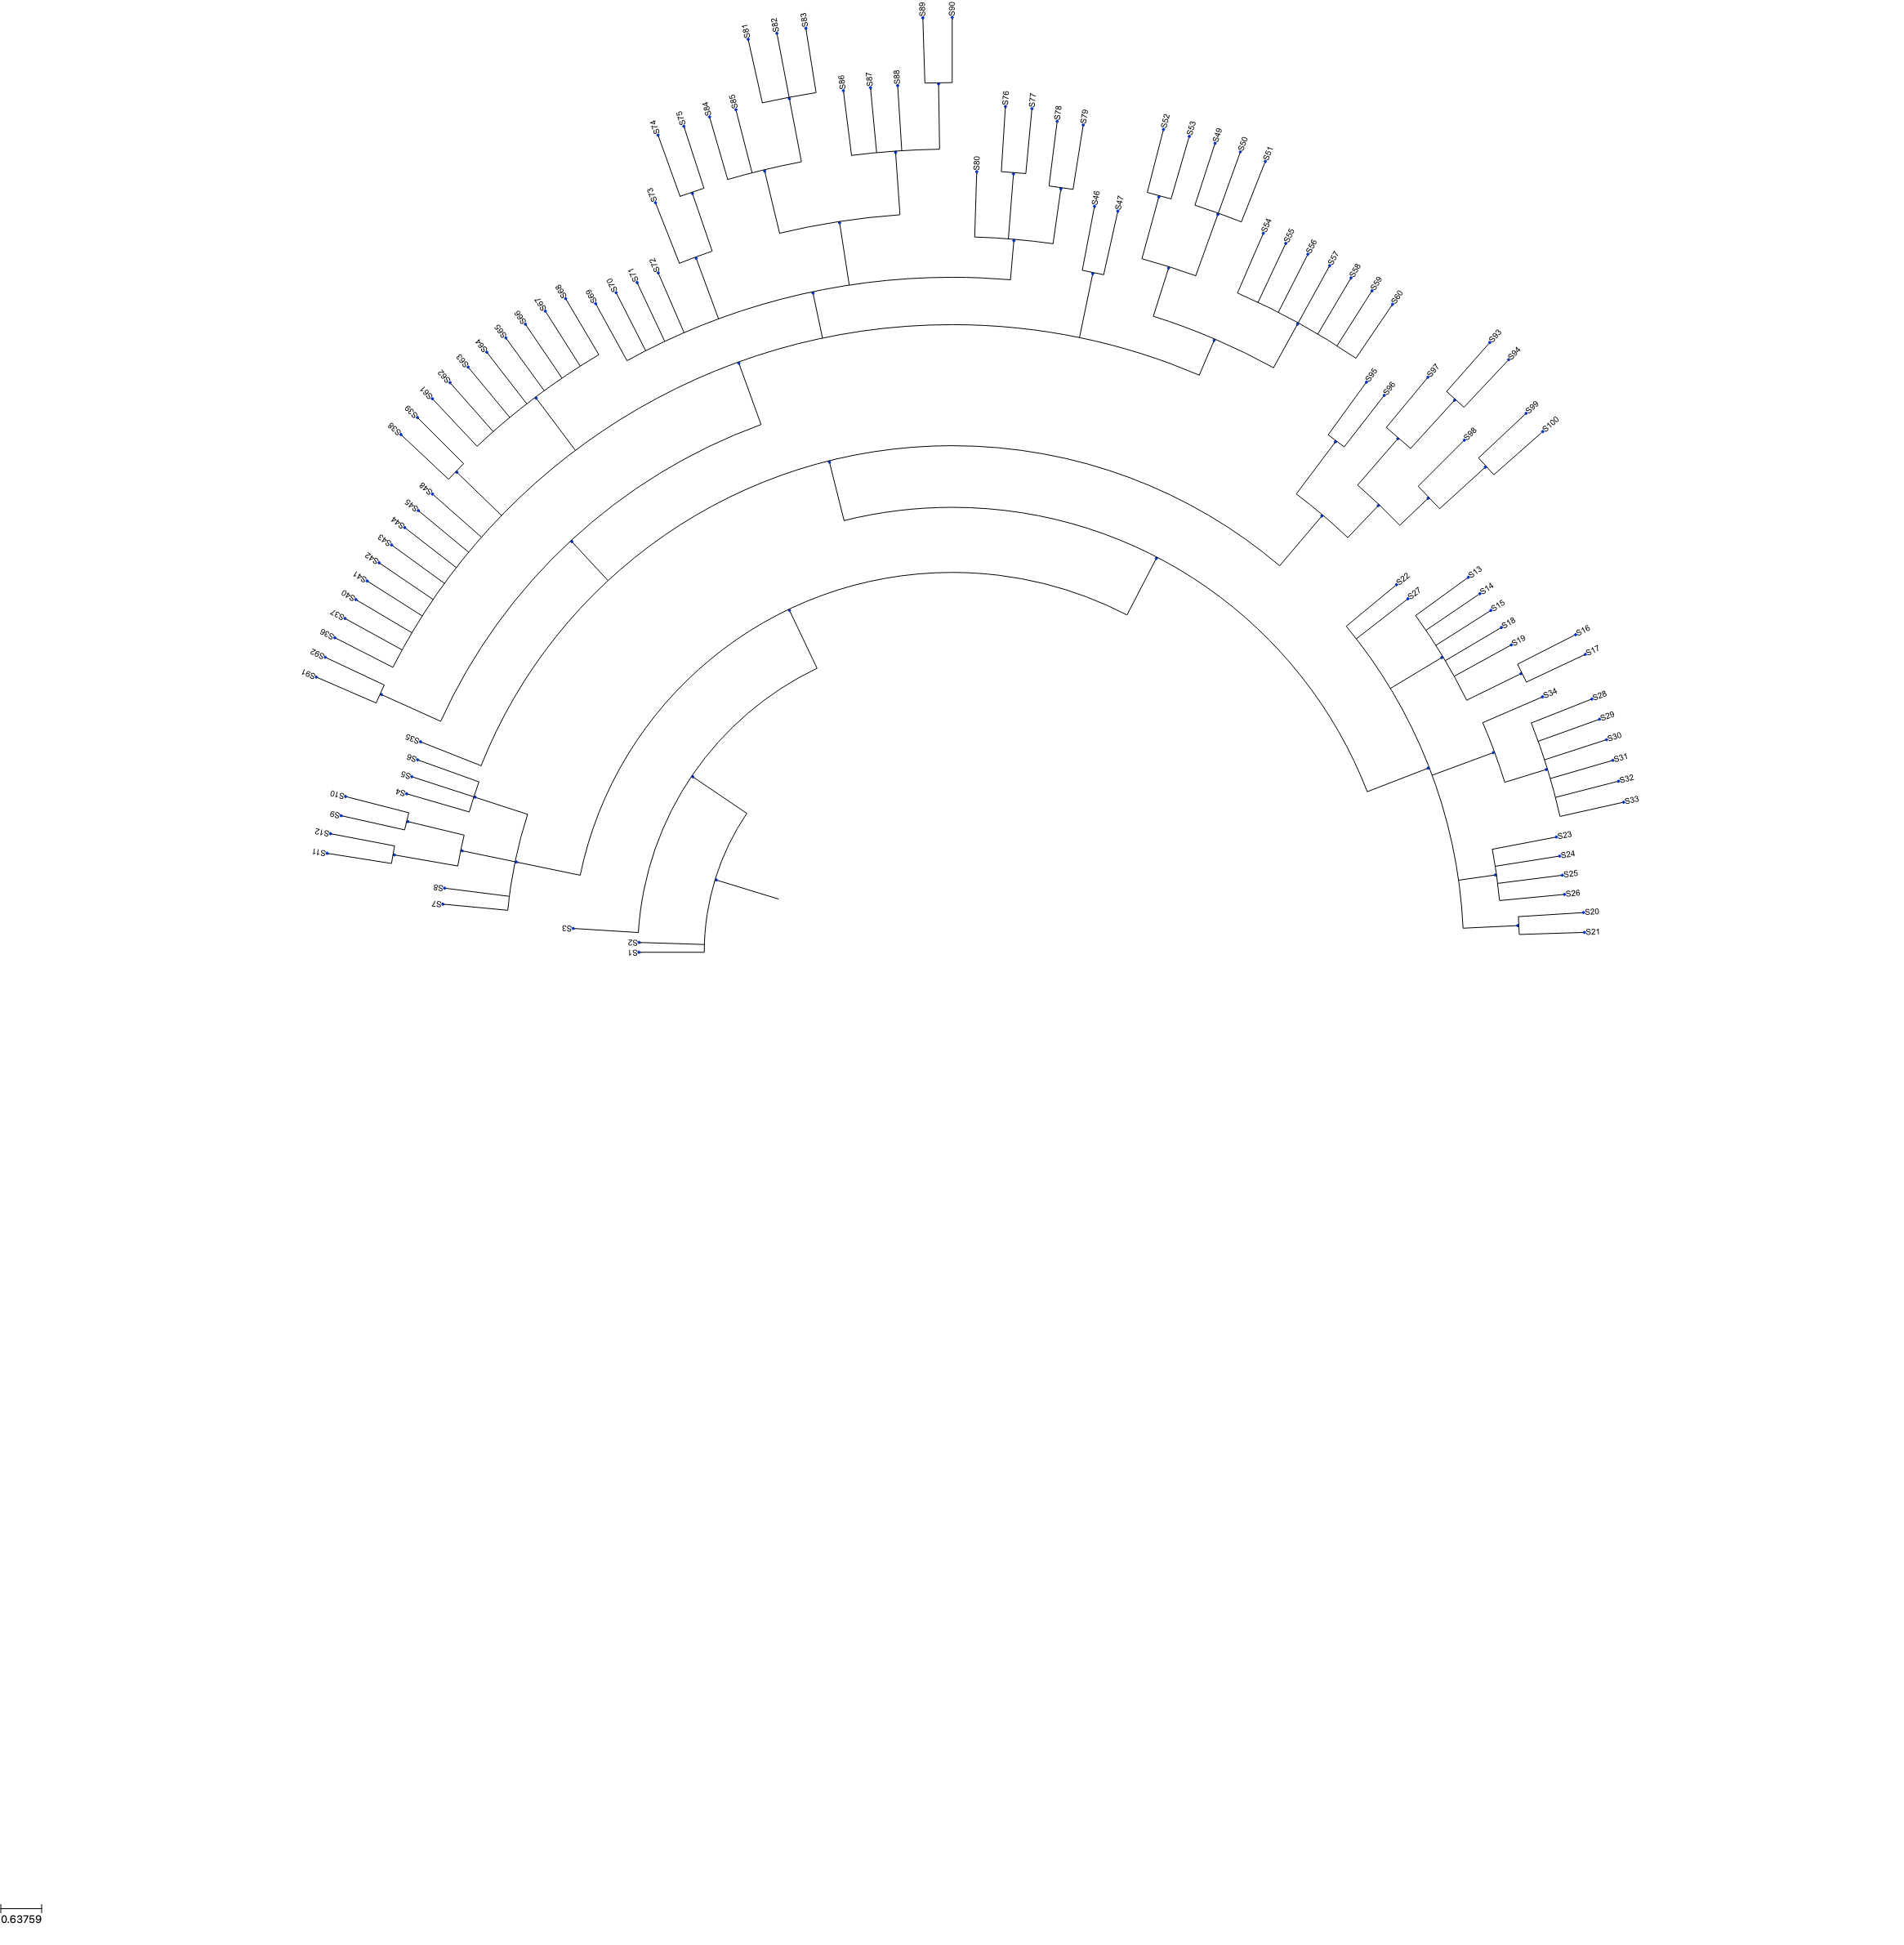

In [19]:
t = ete3.Tree(string)
ts=ete3.TreeStyle()
ts.mode = "c"
ts.arc_start = -180 # 0 degrees = 3 o'clock
ts.arc_span = 180
t.render(file_name="%%inline",tree_style=ts)

In [11]:

ts=ete3.TreeStyle()

In [12]:
color = ["#006BA4", "#FF800E", "#ABABAB", "#595959",
                 "#5F9ED1", "#C85200", "#898989", "#A2C8EC", "#FFBC79", "#CFCFCF"]
_ = get_support(t,majority.taxon_namespace,majority.branch_support,pos = 0,leaf_support = False)
# legendの追加, color配列用意しなきゃいけなくなったのすごい悲しい
ts.legend.add_face(ete3.TextFace("branch_support",fgcolor=color[0]), column=0)
_ = get_support(t,majority.taxon_namespace,majority.transfer_support,pos = 1,leaf_support = False)
ts.legend.add_face(ete3.TextFace("transfer_support",fgcolor=color[1]), column=0)

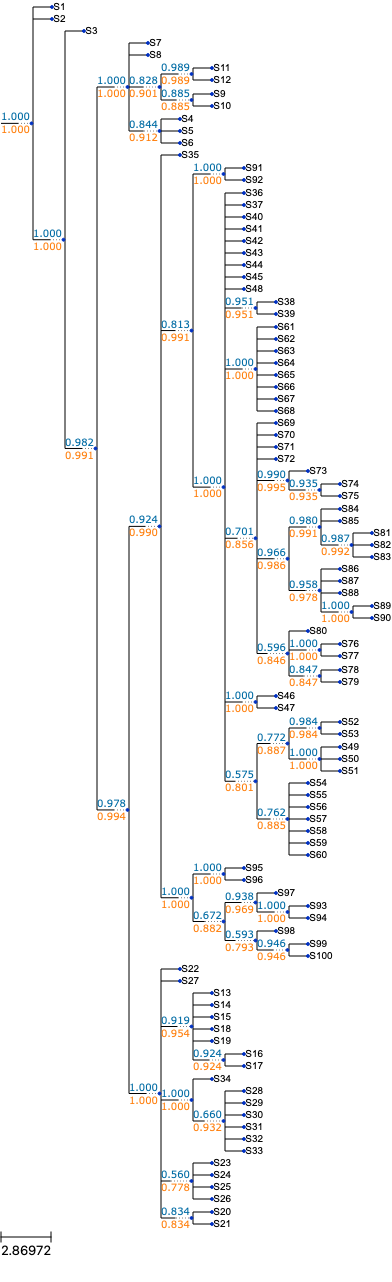

In [13]:
t.render(file_name="%%inline")

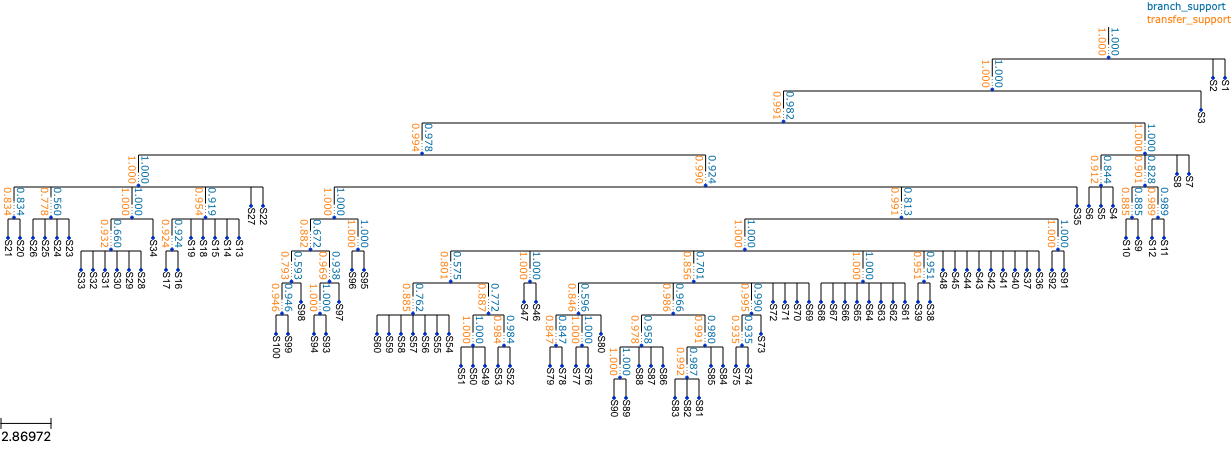

In [14]:
ts.rotation = 90
t.render(file_name="%%inline",tree_style=ts)

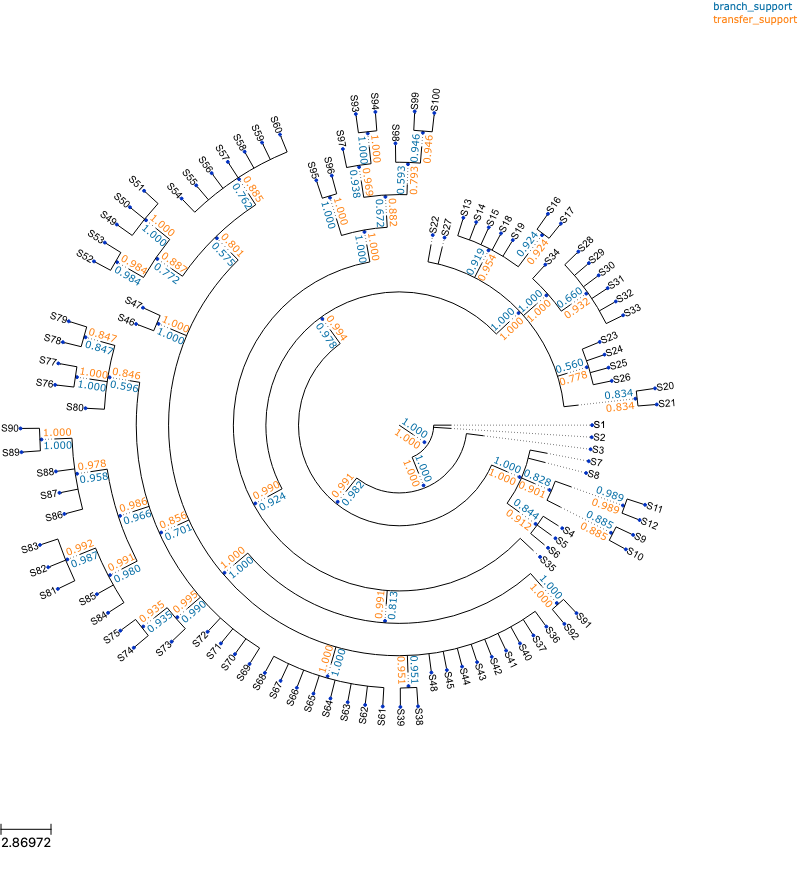

In [15]:
ts.rotation = 0
ts.mode='c'
t.render(file_name="%%inline",tree_style=ts)

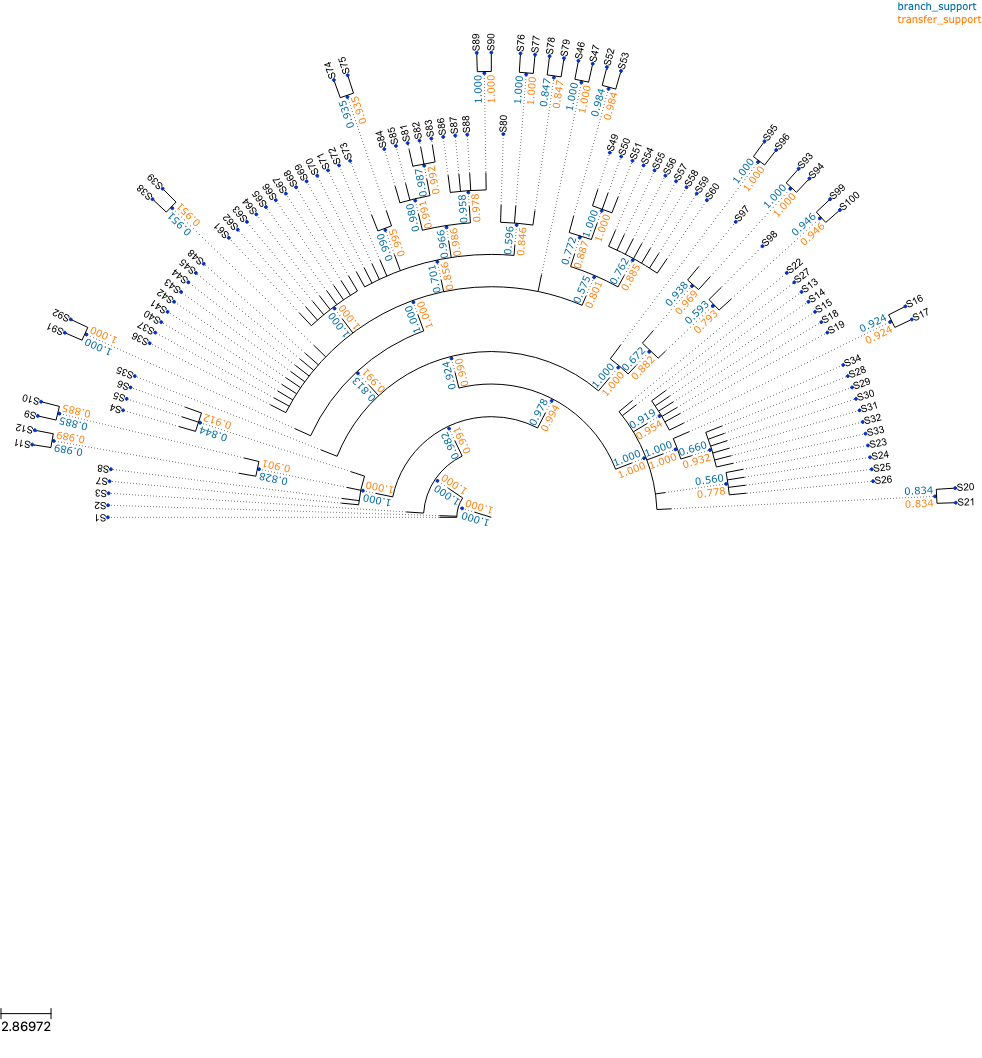

In [16]:
ts.mode = "c"
ts.arc_start = -180 # 0 degrees = 3 o'clock
ts.arc_span = 180
t.render(file_name="%%inline",tree_style=ts)